# Global $C^1$ basis on a general triangulation.

In this notebook we visualize the global basis functions on a general triangulation. We will in this example use the unit square partitioned into four triangles by the center of the square. We start by importing the needed modules, and defining the mesh.

In [8]:
import numpy as np
from PSFEM.mesh import Mesh
from PSFEM.composite_spline import CompositeSplineSpace
from SSplines import sample_triangle

% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vertices = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [0.5, 0.5]
])

triangles = np.array([
    [0, 1, 4],
    [1, 3, 4],
    [3, 2, 4],
    [2, 0, 4]
])

M = Mesh(vertices, triangles)


We then instantiate a $C^1$ spline space $V = \mathcal{S}^1_2(\mathscr{T}_{12})$ on the Powell--Sabin 12-split of this triangulation as follows:

In [9]:
V = CompositeSplineSpace(M)

We sample each of the triangles in the mesh. Visualizing the basis functions can be done by iterating over the basis functions and evaluating them one by one:

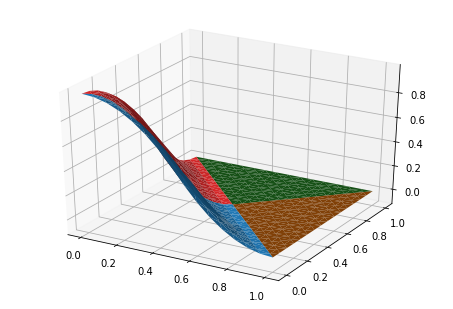

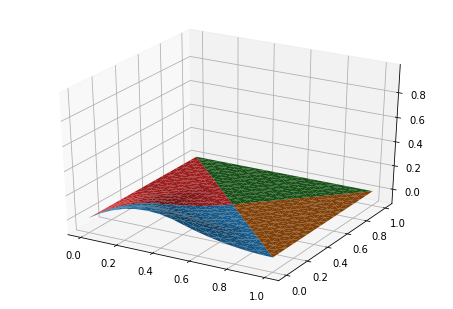

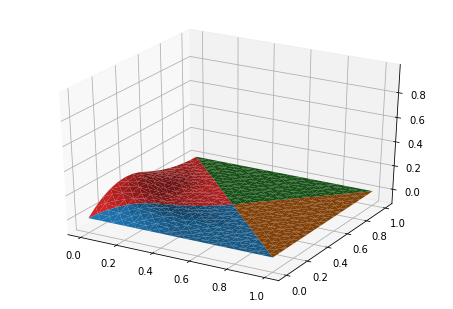

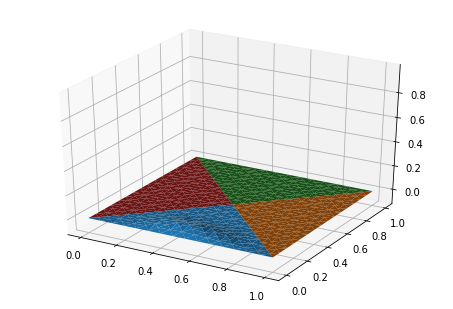

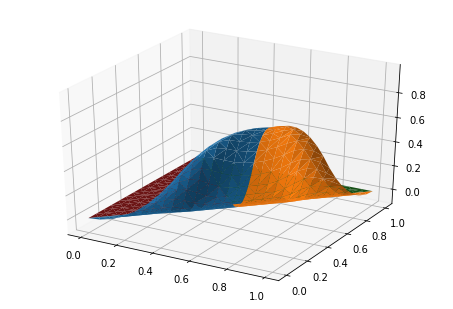

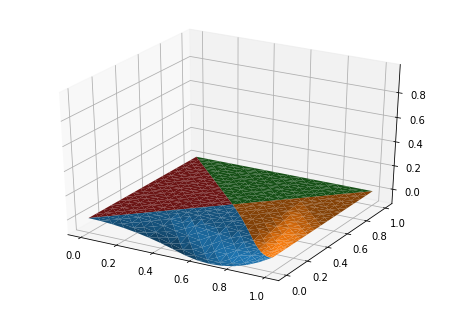

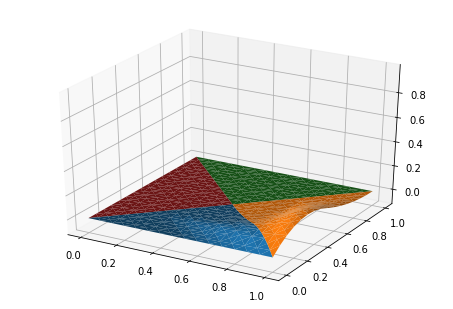

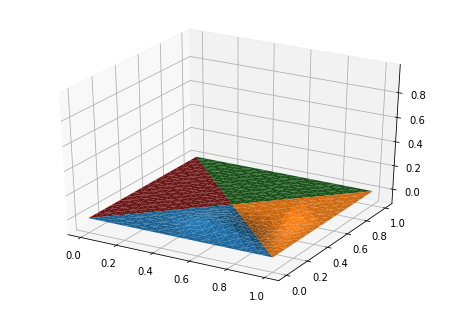

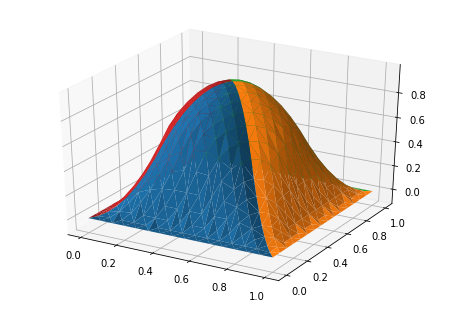

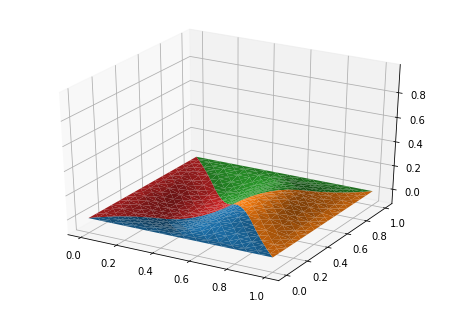

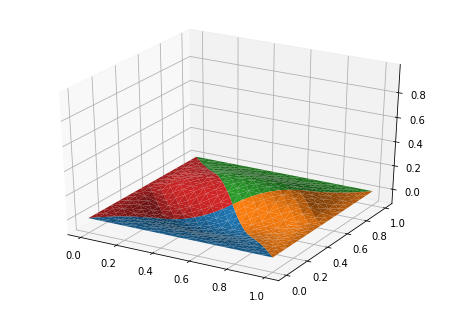

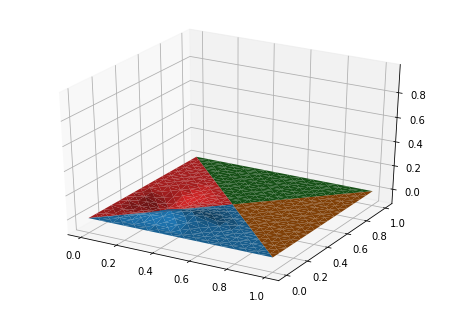

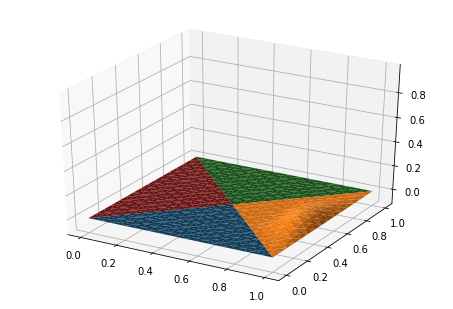

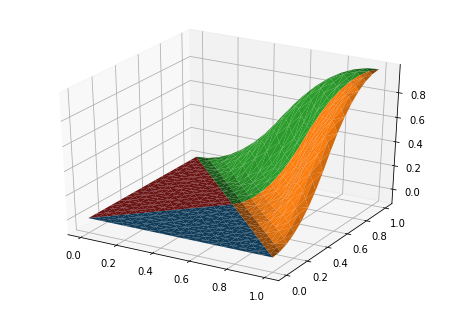

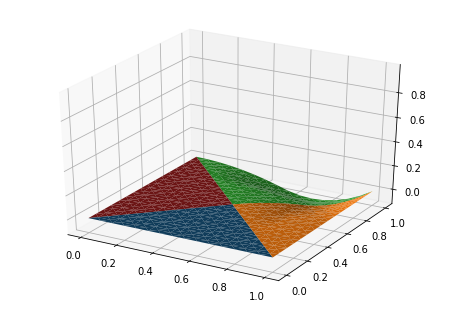

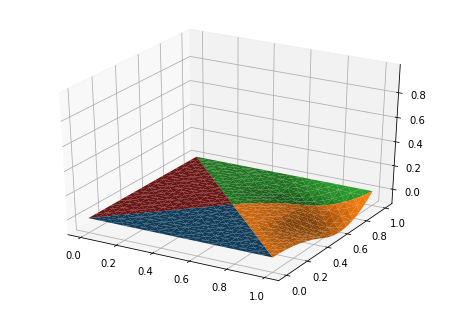

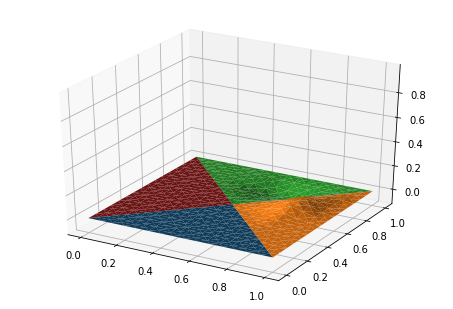

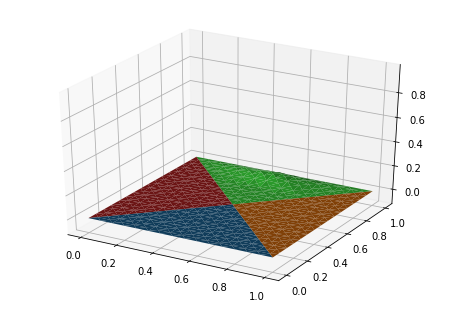

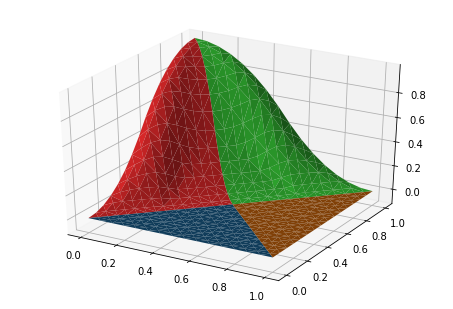

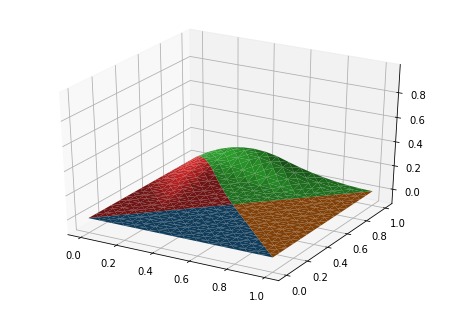

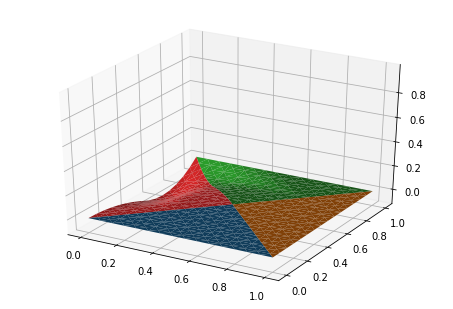

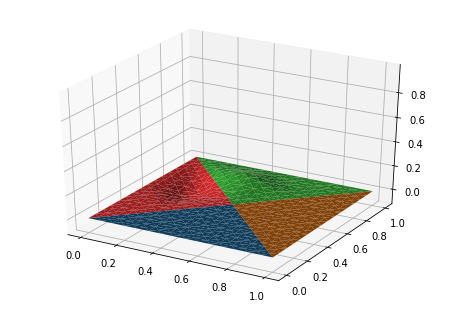

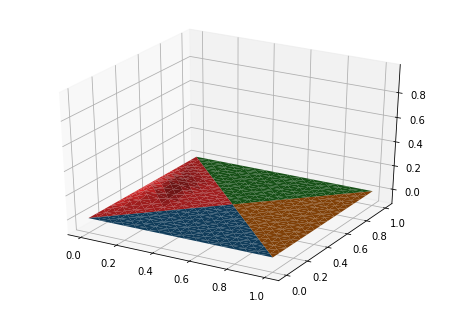

In [13]:
points = [sample_triangle(vertices[triangles[k]], 15) for k in range(len(triangles))]

for basis_function in V.basis:
    fig = plt.figure()
    axs = Axes3D(fig)
    axs.set_zlim3d(-0.1, 1)
    for k in range(len(triangles)):
        p = points[k]
        z = basis_function(p, k)
        axs.plot_trisurf(p[:, 0], p[:, 1], z)
    plt.show()